In [1]:
!python --version

Python 3.8.18


In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from safetensors.torch import load_file
from tqdm import tqdm
import pandas as pd


In [12]:
features = pd.read_csv("sslfeatures_score.csv")
df = features

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,model_name,accuracy,fluency,prosodic,total
0,-0.312636,-0.469341,-0.233398,-0.726744,-0.123130,0.582023,1.533833,-0.107735,0.378165,-0.367880,...,-0.588186,0.131412,0.676301,1.072100,0.469145,gen_w2v2-large,9.0,9.0,9.0,9.0
1,-0.168175,-0.440494,-0.195373,-0.682758,-0.032676,0.306763,1.808508,-0.093684,0.365061,-0.282002,...,-0.784139,0.174786,0.776967,1.035899,0.571026,gen_w2v2-large,7.0,9.0,9.0,7.0
2,-0.200558,-0.453742,-0.220377,-0.691926,-0.048072,0.370473,1.713636,-0.095591,0.374002,-0.310224,...,-0.775388,0.149544,0.763459,1.054175,0.539191,gen_w2v2-large,9.0,9.0,9.0,9.0
3,-0.249609,-0.464179,-0.233789,-0.702581,-0.076562,0.483607,1.624274,-0.102575,0.386654,-0.338182,...,-0.706556,0.139913,0.740864,1.068261,0.502885,gen_w2v2-large,8.0,9.0,8.0,7.0
4,-0.172396,-0.448402,-0.217604,-0.689995,-0.028400,0.329589,1.766693,-0.091417,0.378363,-0.297471,...,-0.764261,0.155847,0.803698,1.060903,0.534560,gen_w2v2-large,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0.005956,0.011442,-0.037425,-0.091800,-0.022152,0.024215,-0.033921,-0.050104,-0.043904,-0.006250,...,0.103243,0.016767,-0.090980,-0.022442,-0.036518,ptctc_wlm,5.0,3.0,3.0,4.0
104996,-0.021480,0.047278,-0.071888,0.022776,0.001719,-0.008967,-0.035891,-0.001905,-0.073057,-0.030910,...,0.081871,-0.008224,-0.054527,-0.007168,-0.046957,ptctc_wlm,6.0,6.0,5.0,5.0
104997,-0.019851,0.004047,-0.050236,-0.001338,-0.010708,0.026346,0.022531,-0.055590,-0.035730,-0.016391,...,0.104731,-0.019901,-0.075207,-0.027392,-0.081663,ptctc_wlm,4.0,3.0,3.0,3.0
104998,0.021291,-0.019406,-0.041489,-0.033971,-0.005212,-0.014104,-0.004423,0.017132,-0.068966,-0.055877,...,0.138642,0.021645,-0.058887,0.023620,-0.023694,ptctc_wlm,5.0,5.0,4.0,4.0


In [58]:
mdname = df['model_name'].tolist()
name = set(mdname)
print(name)

{'pt_hb', 'gen_hb-xlarge-ls960-ft', 'gen_wlm-large', 'gen_hb-large-ll60k', 'ctc_wlm-large', 'fz_wlm-base-plus-sv', 'fz_hb-base-ls960', 'fz_w2v2-xlsr-53', 'gen_w2v2-large', 'ctc_w2v2-large-960h', 'ctc_wlm-base-plus', 'gen_wlm-base-plus-sv', 'fz_w2v2-large-lv60', 'fz_hb-xlarge-ll60k', 'ptctc_wlm', 'ctc_w2v2-xls-r-300m', 'ctc_hb-base-ls960', 'fz_hb-xlarge-ls960-ft', 'ctc_w2v2-large-lv60', 'gen_w2v2-xls-r-300m', 'fz_wlm-large', 'ctc_hb-xlarge-ls960-ft', 'gen_hb-base-ls960', 'ptctc_hb', 'pt_w2v2', 'ctc_hb-xlarge-ll60k', 'ctc_hb-large-ll60k', 'fz_hb-large-ll60k', 'fz_w2v2-large', 'fz_w2v2-xls-r-300m', 'ptctc_w2v2', 'gen_hb-xlarge-ll60k', 'gen_w2v2-xlsr-53', 'pt_wlm', 'ctc_w2v2-large', 'gen_wlm-base-plus', 'gen_w2v2-large-lv60', 'fz_w2v2-large-960h', 'fz_wlm-base-plus', 'ctc_wlm-base-plus-sv', 'gen_w2v2-large-960h', 'ctc_w2v2-xlsr-53'}


In [47]:
df2 = df[df['model_name'] == 'fz_hb-large-ll60k']
df2 = df2.reset_index(drop=True)
df2

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,model_name,accuracy,fluency,prosodic,total
0,-0.275902,0.254108,0.205701,0.250106,-0.212518,0.499977,-0.355526,0.367554,-0.300158,0.411080,...,-0.294387,-0.198440,0.206163,0.447030,0.372273,fz_hb-large-ll60k,9.0,9.0,9.0,9.0
1,-0.272510,0.255209,0.212753,0.258171,-0.242181,0.485063,-0.371254,0.372910,-0.316632,0.398061,...,-0.300094,-0.186916,0.241083,0.449577,0.364978,fz_hb-large-ll60k,7.0,9.0,9.0,7.0
2,-0.286427,0.257319,0.229899,0.275746,-0.252261,0.470763,-0.378302,0.370805,-0.317397,0.390921,...,-0.303169,-0.179393,0.270986,0.442364,0.361953,fz_hb-large-ll60k,9.0,9.0,9.0,9.0
3,-0.275715,0.259644,0.216068,0.249978,-0.248624,0.492447,-0.367895,0.371765,-0.318776,0.400412,...,-0.294391,-0.182971,0.225599,0.455281,0.368653,fz_hb-large-ll60k,8.0,9.0,8.0,7.0
4,-0.191417,0.246983,0.142148,0.164715,-0.176319,0.572570,-0.370379,0.404985,-0.306625,0.416260,...,-0.239307,-0.203394,0.092918,0.410467,0.393941,fz_hb-large-ll60k,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.343815,0.189874,-0.237761,0.066716,-0.081597,0.629781,0.049501,0.161681,0.032993,0.341289,...,-0.056483,-0.157049,-0.391574,0.001585,0.324450,fz_hb-large-ll60k,5.0,3.0,3.0,4.0
2496,0.313184,0.247624,-0.191878,0.051171,-0.130380,0.663903,-0.019922,0.239345,-0.014929,0.339215,...,-0.045657,-0.141177,-0.361773,0.061231,0.323589,fz_hb-large-ll60k,6.0,6.0,5.0,5.0
2497,0.333893,0.229352,-0.224709,0.080224,-0.099145,0.634504,0.033683,0.182782,0.037891,0.351034,...,-0.066624,-0.172309,-0.379747,-0.017786,0.332164,fz_hb-large-ll60k,4.0,3.0,3.0,3.0
2498,0.346305,0.181443,-0.206967,0.074220,-0.090832,0.630825,0.051329,0.153909,0.031671,0.352525,...,-0.055093,-0.192046,-0.387484,-0.009173,0.333590,fz_hb-large-ll60k,5.0,5.0,4.0,4.0


## Split feature vectors and labels

In [48]:
# X is feature vectors

X = df2.drop(['model_name', 'accuracy', 'fluency', 'prosodic', 'total'], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.275902,0.254108,0.205701,0.250106,-0.212518,0.499977,-0.355526,0.367554,-0.300158,0.411080,...,-0.345503,-0.445065,-0.282568,-0.349062,-0.453420,-0.294387,-0.198440,0.206163,0.447030,0.372273
1,-0.272510,0.255209,0.212753,0.258171,-0.242181,0.485063,-0.371254,0.372910,-0.316632,0.398061,...,-0.300246,-0.418067,-0.301408,-0.336382,-0.462266,-0.300094,-0.186916,0.241083,0.449577,0.364978
2,-0.286427,0.257319,0.229899,0.275746,-0.252261,0.470763,-0.378302,0.370805,-0.317397,0.390921,...,-0.294263,-0.400915,-0.311787,-0.323228,-0.470456,-0.303169,-0.179393,0.270986,0.442364,0.361953
3,-0.275715,0.259644,0.216068,0.249978,-0.248624,0.492447,-0.367895,0.371765,-0.318776,0.400412,...,-0.300895,-0.426908,-0.297926,-0.338166,-0.463562,-0.294391,-0.182971,0.225599,0.455281,0.368653
4,-0.191417,0.246983,0.142148,0.164715,-0.176319,0.572570,-0.370379,0.404985,-0.306625,0.416260,...,-0.344416,-0.494403,-0.233886,-0.418516,-0.425805,-0.239307,-0.203394,0.092918,0.410467,0.393941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.343815,0.189874,-0.237761,0.066716,-0.081597,0.629781,0.049501,0.161681,0.032993,0.341289,...,0.091307,-0.174279,0.051263,-0.102558,-0.273606,-0.056483,-0.157049,-0.391574,0.001585,0.324450
2496,0.313184,0.247624,-0.191878,0.051171,-0.130380,0.663903,-0.019922,0.239345,-0.014929,0.339215,...,0.051075,-0.234080,0.018908,-0.153098,-0.308617,-0.045657,-0.141177,-0.361773,0.061231,0.323589
2497,0.333893,0.229352,-0.224709,0.080224,-0.099145,0.634504,0.033683,0.182782,0.037891,0.351034,...,0.101266,-0.183681,0.053674,-0.101587,-0.280655,-0.066624,-0.172309,-0.379747,-0.017786,0.332164
2498,0.346305,0.181443,-0.206967,0.074220,-0.090832,0.630825,0.051329,0.153909,0.031671,0.352525,...,0.102115,-0.167558,0.069542,-0.097599,-0.292934,-0.055093,-0.192046,-0.387484,-0.009173,0.333590


In [49]:
# Y is labels
Y = df2[['accuracy']]
Y

,accuracy
0,9.0
1,7.0
2,9.0
3,8.0
4,9.0
...,...
2495,5.0
2496,6.0
2497,4.0
2498,5.0


## covariance matrix of features

In [50]:
# features are columns from x_std
features = X.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 0.03654352 -0.00022259 -0.02542735 ... -0.03614385 -0.02521487
  -0.0010853 ]
 [-0.00022259  0.00050195  0.00038988 ...  0.00061842  0.00016708
  -0.00010712]
 [-0.02542735  0.00038988  0.01818956 ...  0.02548349  0.01780648
   0.00067873]
 ...
 [-0.03614385  0.00061842  0.02548349 ...  0.03735427  0.02397106
   0.00051853]
 [-0.02521487  0.00016708  0.01780648 ...  0.02397106  0.01887122
   0.00111598]
 [-0.0010853  -0.00010712  0.00067873 ...  0.00051853  0.00111598
   0.00036587]]


## eigen vectors and eigen values from covariance matrix

In [51]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [52]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 7.54245319e-02  1.04092574e-02  5.05660466e-02 ...  1.90987663e-02
  -1.42931126e-03  5.61654291e-03]
 [-7.91477181e-04 -3.19012233e-03  4.08708641e-02 ... -9.42467081e-03
   8.03147946e-03 -2.04511584e-02]
 [-5.31736442e-02 -3.90995321e-03  2.09348130e-02 ...  1.98537072e-02
  -1.26356426e-02 -2.63884337e-02]
 ...
 [-7.46689249e-02 -3.95982876e-02  2.70978390e-02 ...  8.46171536e-06
  -8.64378884e-03  3.48284972e-02]
 [-5.31634850e-02  2.57222574e-02 -1.04148335e-02 ... -3.25833149e-02
   1.49144220e-03 -2.71655635e-03]
 [-2.25882720e-03  1.10729176e-02 -3.55067946e-02 ...  3.69308242e-02
  -3.90012504e-02 -2.30586088e-02]]


In [53]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[6.35367568e+00 1.10541698e+00 7.92197415e-02 ... 3.27182900e-07
 3.48827501e-07 3.25575388e-07]


In [54]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.8280384912270526

## Project data point onto selected Eigen Vector

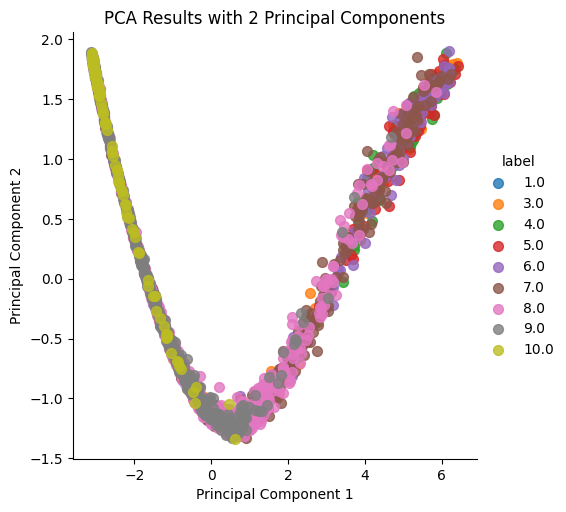

In [56]:
from sklearn import decomposition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
pca = decomposition.PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Assuming 'Y' is a series or list-like object containing labels
pca_df['label'] = Y  # Make sure Y has the same length as rows in X

# Plotting using seaborn's lmplot
sns.lmplot(x='PC1', y='PC2', data=pca_df, fit_reg=False, scatter_kws={"s": 50}, hue="label")

# Setting the plot title and labels
plt.title('PCA Results with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.show()


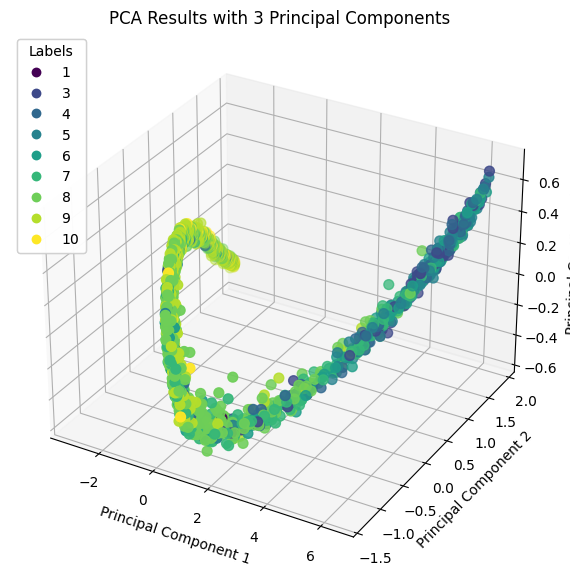

In [57]:
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D scatter plot을 위한 모듈

# Assuming X is your feature matrix
pca = decomposition.PCA(n_components=3)  # 3개의 주성분으로 PCA 설정
pca_result = pca.fit_transform(X)

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])  # 3차원 결과를 저장

# Assuming 'Y' is a series or list-like object containing labels
pca_df['label'] = Y  # Make sure Y has the same length as rows in X

# Plotting 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # 3D plot을 위한 설정

# Scatter plot
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['label'], cmap='viridis', s=50)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)

# Setting the plot title and labels
ax.set_title('PCA Results with 3 Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show plot
plt.show()
